# Assigment: Principal Component Analysis
#### Author: Kenneth Cochran 
#### Date written: 5/11/23

## Write your own class in Python to perform PCA analysis

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

class MyPCA:
    
    def __init__(self, n_components):
        self.n_components = n_components   
        
    def fit(self, X):
        # Does mean-centering of the data 
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        X_std = (X - self.mean)
        
        # Computes covariance matrix and does eigen-decomposition      
        cov_mat = np.cov(X_std.T)
        eig_values, eig_vectors = np.linalg.eig(cov_mat) 
        
        # sorts the eigenvectors that are largest in absolute value  
        max_abs_idx = np.argmax(np.abs(eig_vectors), axis=0)
        signs = np.sign(eig_vectors[max_abs_idx, range(eig_vectors.shape[0])])
        eig_vectors = eig_vectors*signs[np.newaxis,:]
        eig_vectors = eig_vectors.T
        eig_pairs = [(np.abs(eig_values[i]), eig_vectors[i,:]) for i in range(len(eig_values))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_values_sorted = np.array([x[0] for x in eig_pairs])
        eig_vectors_sorted = np.array([x[1] for x in eig_pairs])
        self.components = eig_vectors_sorted[:self.n_components,:]
        k = 2
        W = eig_vectors_sorted[:k, :]
        
        # Calculates variance explained by each principle component and cumulative variance
        self.explained_variance_percent = [i/np.sum(eig_values) for i in eig_values_sorted[:self.n_components]] 
        self.cum_explained_variance = np.cumsum(self.explained_variance_percent)
        
        # Projects the data onto the principle component axes and caluculates all the scores
        X_projected = X_std.dot(W.T)
        self.scores = pd.DataFrame(X_projected, columns = ['PC1', 'PC2'])
        
        # calculates the loadings 
        self.loadings = pd.DataFrame(self.components.T, columns=['PC1', 'PC2'])

        return self
    
    # Prints the individual and cumulative variance of each principle component 
    def variance(self):
        i = 0
        while i < self.n_components:
            print("variance explained by PC",(i+1),':', self.explained_variance_percent[i])
            print("Percent variance explained by PC",(i+1),':', (self.explained_variance_percent[i]*100))
            i+=1
        print('Cumulative explained variance:', self.cum_explained_variance)
        
    # Prints the scores of each principle component
    def printScores(self):
        print('PCA Scores:\n',self.scores)
        
    # Prints the loadings of each principle component
    def printLoadings(self):
        print('Loadings:\n',self.loadings )
        
    # Prints the scree plot of the first two principle components
    def screePlot(self):
        plt.bar(['PC1', 'PC2'],self.explained_variance_percent)
        plt.xlabel('Principal components')
        plt.ylabel('Explained Variance')
        plt.title("Scree Plot")
        plt.show
        
    # Prints the loadings plot of the first two principle components
    def plotLoadings(self):
        plt.scatter(self.loadings['PC1'], self.loadings['PC2'])
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("Loadings Plot")
        plt.show
    
    # Plots the principle component axis
    def plotPC1(self):
        plt.scatter(self.scores["PC1"], np.zeros_like(self.scores["PC1"]))
        plt.xlabel('PC1')
        plt.title('First principal component projection')
        plt.show
        
    # Plots the two prinicple component axis AKA the scores plot
    def plotPCA(self): 
        plt.scatter(self.scores["PC1"], self.scores["PC2"])
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('PCA projection')
        plt.show

## Projecting the raw data 

[Text(0.5, 1.0, 'Raw_data projection')]

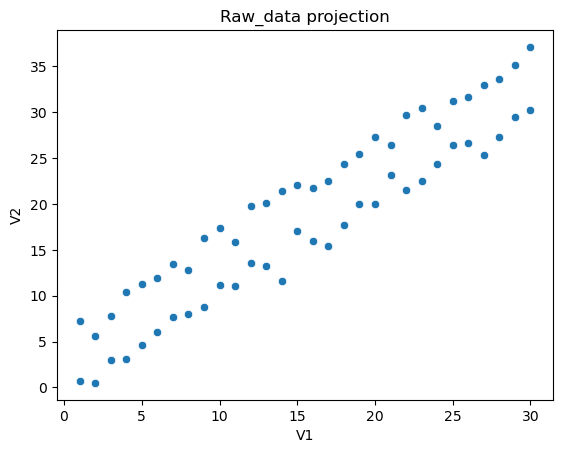

In [255]:
in_file_name = "../data/Homework_2_dataset_prob3.csv" 
data_in = pd.read_csv(in_file_name)
data = data_in.values

raw_data = pd.DataFrame(data, columns = ['V1', 'V2'])
sb.scatterplot(data = raw_data, x='V1', y = 'V2').set(title = 'Raw_data projection')

Yes I can see a pretty clear separation in the raw data and it obviously has a linear relationship.

## Does PCA on the raw data and projects onto first principal component

In [256]:
my_pca = MyPCA(n_components = 2)
my_pca.fit(data)

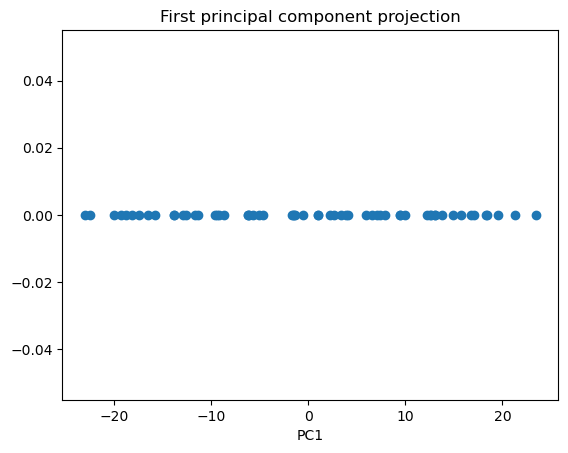

In [257]:
my_pca.plotPC1()

I can no longer see a clear separation in the data after projecting it onto the first principal component, this observation tells me that most of the variation in the data is accounted for by the first principle component. 

## Plots the final scores plot after PCA and prints the variance of PC1 and PC2

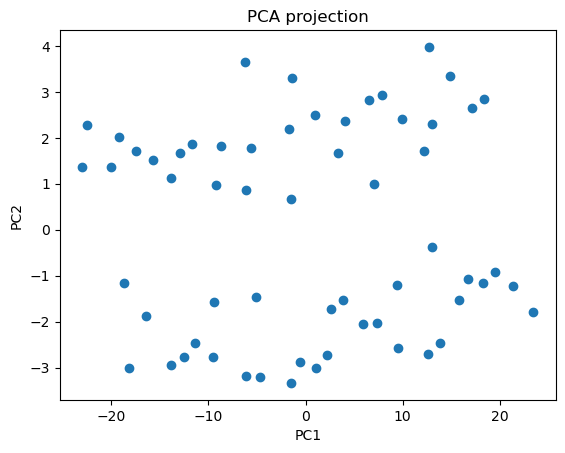

In [258]:
my_pca.plotPCA()

In [259]:
my_pca.variance()

variance explained by PC 1 : 0.9691556416500623
Percent variance explained by PC 1 : 96.91556416500623
variance explained by PC 2 : 0.03084435834993772
Percent variance explained by PC 2 : 3.084435834993772
Cumulative explained variance: [0.96915564 1.        ]


## Apply PCA function to Homework_2_dataset_prob4.csv

In [260]:
in_file_name = "../data/Homework_2_dataset_prob4.csv" 
data_in = pd.read_csv(in_file_name)
data = data_in.drop(['ComponetID'], axis = 1)
transposed = data.T

In [261]:
my_pca = MyPCA(n_components = 2)
my_pca.fit(transposed.values)

## Plot the scree plot for PC1 and PC2

C:\Users\kecoc\anaconda3\lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


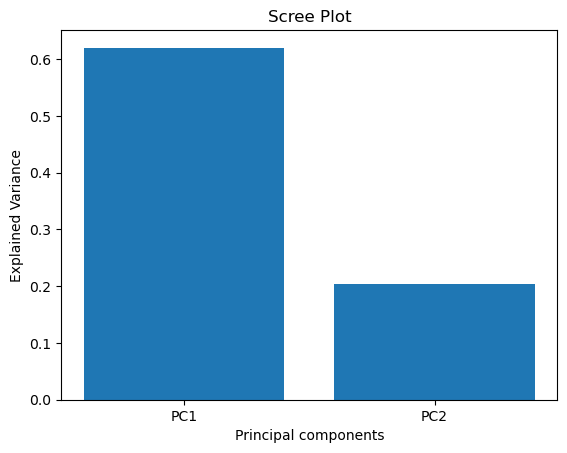

In [262]:
my_pca.screePlot()

## Percent variance that PC1 and PC2 explain 

In [263]:
my_pca.variance()

variance explained by PC 1 : (0.62017220853825-1.2309015970696935e-37j)
Percent variance explained by PC 1 : (62.017220853824995-1.2309015970696936e-35j)
variance explained by PC 2 : (0.20325488636553693-4.034149882808364e-38j)
Percent variance explained by PC 2 : (20.325488636553693-4.0341498828083635e-36j)
Cumulative explained variance: [0.62017221-1.23090160e-37j 0.82342709-1.63431659e-37j]


## Plot the scores plot

C:\Users\kecoc\anaconda3\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


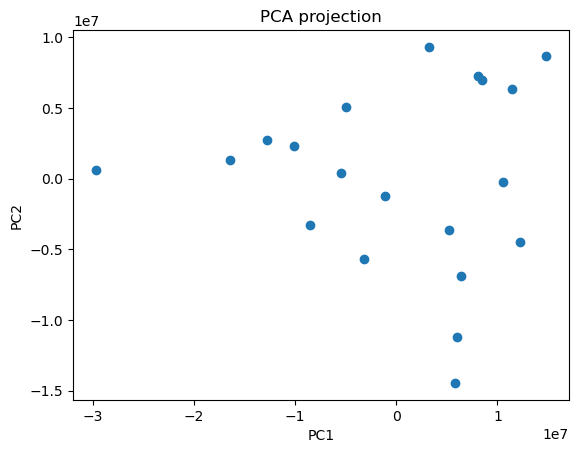

In [264]:
my_pca.plotPCA()

## Plot the loadings plot

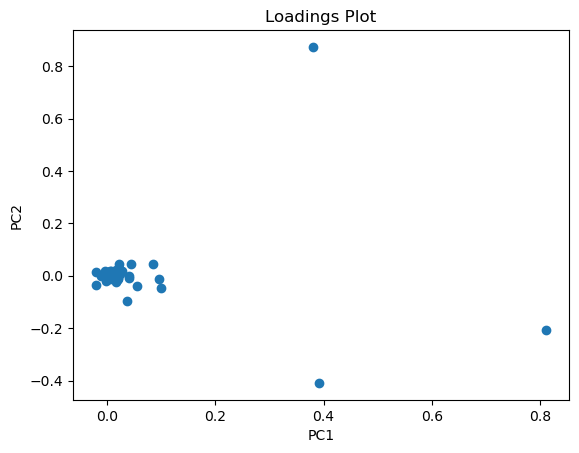

In [265]:
my_pca.plotLoadings()